In [1]:
import numpy as np
import matplotlib.pyplot as plt
import lya_mock_p1d as mock

In [2]:
# number of cells (power of two)
N2 = 15
# cell width (in km/s)
dv_kms=10
# whether to use white noise power or not
white_noise=False
# random seed
seed=555

In [3]:
# generate a mock maker
mock_maker=mock.MockMaker(N2,dv_kms,seed,white_noise)

In [4]:
# get redshift for each cell
z = mock_maker.get_redshifts()

In [6]:
# get Gaussian field
delta, var_delta = mock_maker.get_gaussian_field()
print('mean delta =', np.mean(delta))
print('var delta =', np.var(delta))
print('expected var delta =', var_delta)

mean delta = 0.000258942265572
var delta = 1.19837397061
expected var delta = 1.15848670573


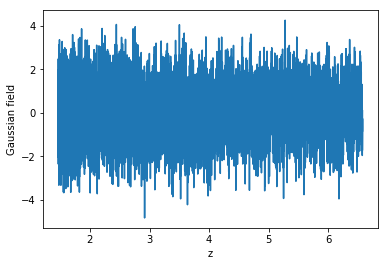

In [7]:
plt.plot(z,delta)
plt.xlabel('z')
plt.ylabel('Gaussian field')
plt.show()

In [8]:
density = mock_maker.get_density(var_delta,z,delta)
print('mean density =', np.mean(density))
print('var density =', np.var(density))

mean density = 5.72779018568
var density = 11871.1946277


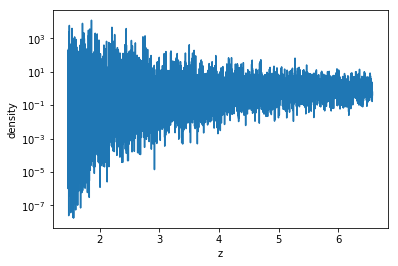

In [9]:
plt.semilogy(z,density)
plt.xlabel('z')
plt.ylabel('density')
plt.show()

In [10]:
tau = mock.get_tau(z,density)
print('mean tau =', np.mean(tau))
print('var tau =', np.var(tau))

mean tau = 2.50357440916
var tau = 116.244283883


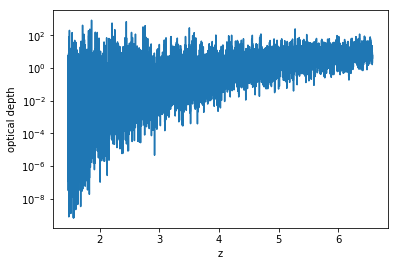

In [11]:
plt.semilogy(z,tau)
plt.xlabel('z')
plt.ylabel('optical depth')
plt.show()

In [12]:
flux = mock.get_flux(tau)
print('mean flux =', np.mean(flux))
print('var flux =', np.var(flux))

mean flux = 0.63141673282
var flux = 0.156293302685


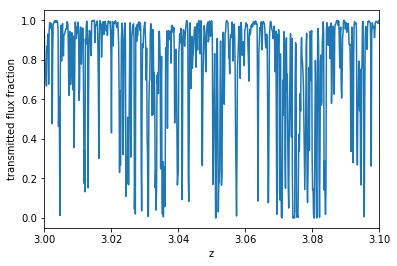

In [13]:
plt.plot(z,flux)
plt.xlabel('z')
plt.ylabel('transmitted flux fraction')
plt.xlim(3.0,3.1)
plt.show()

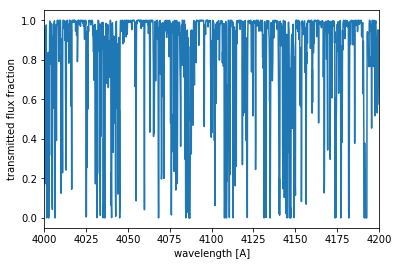

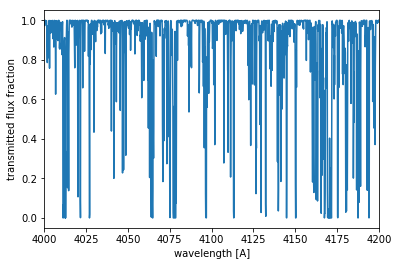

In [15]:
# test mock in one shot, for several mocks
for i in range(2):
    test_wave, test_flux = mock_maker.get_lya_skewer()
    plt.plot(test_wave,test_flux)
    plt.xlabel('wavelength [A]')
    plt.ylabel('transmitted flux fraction')
    plt.xlim(4000,4200)
    plt.show()